<a href="https://colab.research.google.com/github/sametgumus212/Python/blob/master/Deepch_solubility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x
!wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
!chmod +x Anaconda3-2019.10-Linux-x86_64.sh
!bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local
!conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
import deepchem as dc

TensorFlow 1.x selected.
--2020-09-18 20:58:18--  https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 530308481 (506M) [application/x-sh]
Saving to: ‘Anaconda3-2019.10-Linux-x86_64.sh’

Anaconda3-2019.10-L 100%[===================>] 505.74M   164MB/s    in 3.1s    

2020-09-18 20:58:22 (164 MB/s) - ‘Anaconda3-2019.10-Linux-x86_64.sh’ saved [530308481/530308481]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _ipyw_jlab_nb_ext_conf==0.1.0=py37_0
    - _libgcc_mutex==0.1=main
    - alabaster==0.7.12=py37_0
    - anaconda-client==1.7.2=py37_0
    - anaconda-

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:
import deepchem as dc
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='GraphConv')
train_dataset, valid_dataset, test_dataset = datasets

Loading raw samples now.
shard_size: 8192
About to start loading CSV from /tmp/delaney-processed.csv
Loading shard 1 of size 8192.
Featurizing sample 0
Featurizing sample 1000
TIMING: featurizing shard 0 took 2.844 s
TIMING: dataset construction took 3.241 s
Loading dataset from disk.
TIMING: dataset construction took 0.574 s
Loading dataset from disk.
TIMING: dataset construction took 0.153 s
Loading dataset from disk.
TIMING: dataset construction took 0.147 s
Loading dataset from disk.
TIMING: dataset construction took 0.431 s
Loading dataset from disk.
TIMING: dataset construction took 0.041 s
Loading dataset from disk.
TIMING: dataset construction took 0.041 s
Loading dataset from disk.


In [3]:

model = dc.models.GraphConvModel(n_tasks=1, mode='regression', dropout=0.2)
model.fit(train_dataset, nb_epoch=100)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


0.0

In [4]:

metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)
print("Training set score")
print(model.evaluate(train_dataset, [metric], transformers))
print("Test set score")
print(model.evaluate(test_dataset, [metric], transformers))


Training set score
computed_metrics: [0.9582592987156305]
{'pearson_r2_score': 0.9582592987156305}
Test set score
computed_metrics: [0.8815257746328814]
{'pearson_r2_score': 0.8815257746328814}


In [9]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
import pandas as pd
import numpy as np


Mounted at /content/drive/


In [6]:
data=pd.read_csv('/content/drive/My Drive/drug/eslesenler')
data.head()

,DrugBank ID,Name,CAS Number,Drug Groups,InChIKey,InChI,SMILES,Formula,KEGG Compound ID,KEGG Drug ID,PubChem Compound ID,PubChem Substance ID,ChEBI ID,ChEMBL ID,HET ID,ChemSpider ID,BindingDB ID
0,DB14761,Remdesivir,1809249-37-3,investigational,RWWYLEGWBNMMLJ-YSOARWBDSA-N,InChI=1S/C27H35N6O8P/c1-4-18(5-2)13-38-26(36)1...,CCC(CC)COC(=O)[C@H](C)N[P@](=O)(OC[C@H]1O[C@](...,C27H35N6O8P,NaN,NaN,NaN,NaN,145994.0,CHEMBL4065616,NaN,58827832.0,NaN
1,DB00608,Chloroquine,54-05-7,approved; investigational; vet_approved,WHTVZRBIWZFKQO-UHFFFAOYSA-N,InChI=1S/C18H26ClN3/c1-4-22(5-2)12-6-7-14(3)21...,CCN(CC)CCCC(C)NC1=CC=NC2=CC(Cl)=CC=C12,C18H26ClN3,C07625,D02366,2719.0,46506925.0,3638.0,CHEMBL76,CLQ,2618.0,22985.0
2,DB00503,Ritonavir,155213-67-5,approved; investigational,NCDNCNXCDXHOMX-XGKFQTDJSA-N,InChI=1S/C37H48N6O5S2/c1-24(2)33(42-36(46)43(5...,CC(C)[C@H](NC(=O)N(C)CC1=CSC(=N1)C(C)C)C(=O)N[...,C37H48N6O5S2,C07240,D00427,392622.0,46505050.0,45409.0,CHEMBL163,RIT,347980.0,520.0
3,DB08868,Fingolimod,162359-55-9,approved; investigational,KKGQTZUTZRNORY-UHFFFAOYSA-N,InChI=1S/C19H33NO2/c1-2-3-4-5-6-7-8-17-9-11-18...,CCCCCCCCC1=CC=C(CCC(N)(CO)CO)C=C1,C19H33NO2,NaN,D10001,107970.0,175427125.0,63115.0,CHEMBL314854,NaN,97087.0,50158336.0
4,DB15660,N4-Hydroxycytidine,3258-02-4,experimental,XCUAIINAJCDIPM-XVFCMESISA-N,InChI=1S/C9H13N3O6/c13-3-4-6(14)7(15)8(18-4)12...,OC[C@H]1O[C@H]([C@H](O)[C@@H]1O)N1C=CC(NO)=NC1=O,C9H13N3O6,NaN,NaN,NaN,NaN,NaN,CHEMBL2178720,NaN,170635.0,NaN


In [11]:
arr=[]
for i in  data.SMILES:
  arr.append(i)


In [12]:
arr

['CCC(CC)COC(=O)[C@H](C)N[P@](=O)(OC[C@H]1O[C@](C#N)([C@H](O)[C@@H]1O)C1=CC=C2N1N=CN=C2N)OC1=CC=CC=C1',
 'CCN(CC)CCCC(C)NC1=CC=NC2=CC(Cl)=CC=C12',
 'CC(C)[C@H](NC(=O)N(C)CC1=CSC(=N1)C(C)C)C(=O)N[C@H](C[C@H](O)[C@H](CC1=CC=CC=C1)NC(=O)OCC1=CN=CS1)CC1=CC=CC=C1',
 'CCCCCCCCC1=CC=C(CCC(N)(CO)CO)C=C1',
 'OC[C@H]1O[C@H]([C@H](O)[C@@H]1O)N1C=CC(NO)=NC1=O',
 'NC(=O)C1=NC(F)=CN=C1O',
 'CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(OC)[C@@H](O)[C@H](C)O2)[C@H](C)[C@@H](O[C@@H]2O[C@H](C)C[C@@H]([C@H]2O)N(C)C)[C@](C)(O)C[C@@H](C)CN(C)[C@H](C)[C@@H](O)[C@]1(C)O',
 'CCN(CCO)CCCC(C)NC1=C2C=CC(Cl)=CC2=NC=C1',
 'CC(C)[C@H](N1CCCNC1=O)C(=O)N[C@H](C[C@H](O)[C@H](CC1=CC=CC=C1)NC(=O)COC1=C(C)C=CC=C1C)CC1=CC=CC=C1',
 '[H][C@@]12CCO[C@]1([H])OC[C@@H]2OC(=O)N[C@@H](CC1=CC=CC=C1)[C@H](O)CN(CC(C)C)S(=O)(=O)C1=CC=C(N)C=C1',
 'N#CC[C@H](C1CCCC1)N1C=C(C=N1)C1=C2C=CNC2=NC=N1',
 '[H][C@]1(N[C@H](CO)[C@@H](O)[C@H]1O)C1=CNC2=C1N=CN=C2N',
 'CCS(=O)(=O)N1CC(CC#N)(C1)N1C=C(C=N1)C1=C2C=CNC2=NC=N1',
 '[H][C@@]12C[C@@]3([H]

In [13]:
smiles = arr

In [15]:
from rdkit import Chem
import numpy as np
mols = [Chem.MolFromSmiles(s) for s in smiles]
featurizer = dc.feat.ConvMolFeaturizer()
x = featurizer.featurize(mols)
predicted_solubility = model.predict_on_batch(x)
solarr=[]
for m,s in zip(smiles, predicted_solubility):
    #print()
    #print('Molecule:', m)
   # print('Predicted solubility:', s)
    solarr.append(s)

In [16]:
from rdkit import Chem
mol_list= []
for element in arr:
  mol = Chem.MolFromSmiles(element)
  mol_list.append(mol)

In [17]:
len(mol_list)

310

In [18]:
mol_list[:5]

In [19]:
from rdkit.Chem import Descriptors

In [22]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_MolWt = Descriptors.MolWt(mol)
        desc_NumRotatableBonds = Descriptors.NumRotatableBonds(mol)
           
        row = np.array([desc_MolLogP,
                        desc_MolWt,
                        desc_NumRotatableBonds])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MolLogP","MolWt","NumRotatableBonds"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [23]:
df=lipinski(arr)
df.head()

,MolLogP,MolWt,NumRotatableBonds
0,2.31218,602.585,13.0
1,4.81060,319.880,8.0
2,5.90520,720.962,17.0
3,3.20430,307.478,12.0
4,-2.34410,259.218,3.0


In [24]:
def AromaticAtoms(m):
  aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
  aa_count = []
  for i in aromatic_atoms:
    if i==True:
      aa_count.append(1)
  sum_aa_count = sum(aa_count)
  return sum_aa_count

In [27]:
desc_AromaticAtoms = [AromaticAtoms(element) for element in mol_list]
desc_AromaticAtoms[:5]

[15, 10, 22, 6, 6]

In [29]:

desc_HeavyAtomCount = [Descriptors.HeavyAtomCount(element) for element in mol_list]
desc_HeavyAtomCount[:5]

[42, 22, 50, 22, 18]

In [30]:
desc_AromaticProportion = [AromaticAtoms(element)/Descriptors.HeavyAtomCount(element) for element in mol_list]
desc_AromaticProportion[:10]

[0.35714285714285715,
 0.45454545454545453,
 0.44,
 0.2727272727272727,
 0.3333333333333333,
 0.5454545454545454,
 0.0,
 0.43478260869565216,
 0.391304347826087,
 0.3157894736842105]

In [31]:

df_desc_AromaticProportion = pd.DataFrame(desc_AromaticProportion, columns=['AromaticProportion'])
df_desc_AromaticProportion

,AromaticProportion
0,0.357143
1,0.454545
2,0.440000
3,0.272727
4,0.333333
...,...
305,0.583333
306,0.341772
307,0.315789
308,0.000000


In [33]:
sar=pd.DataFrame(solarr,columns=['Solubililty'])
sar.head()


,Solubililty
0,-0.514631
1,-1.177363
2,-0.893327
3,-0.608443
4,0.704666


In [34]:
newdata=pd.concat([data,X,sar],axis=1)
newdata.head()

,DrugBank ID,Name,CAS Number,Drug Groups,InChIKey,InChI,SMILES,Formula,KEGG Compound ID,KEGG Drug ID,PubChem Compound ID,PubChem Substance ID,ChEBI ID,ChEMBL ID,HET ID,ChemSpider ID,BindingDB ID,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,Solubililty
0,DB14761,Remdesivir,1809249-37-3,investigational,RWWYLEGWBNMMLJ-YSOARWBDSA-N,InChI=1S/C27H35N6O8P/c1-4-18(5-2)13-38-26(36)1...,CCC(CC)COC(=O)[C@H](C)N[P@](=O)(OC[C@H]1O[C@](...,C27H35N6O8P,NaN,NaN,NaN,NaN,145994.0,CHEMBL4065616,NaN,58827832.0,NaN,2.31218,602.585,13.0,0.357143,-0.514631
1,DB00608,Chloroquine,54-05-7,approved; investigational; vet_approved,WHTVZRBIWZFKQO-UHFFFAOYSA-N,InChI=1S/C18H26ClN3/c1-4-22(5-2)12-6-7-14(3)21...,CCN(CC)CCCC(C)NC1=CC=NC2=CC(Cl)=CC=C12,C18H26ClN3,C07625,D02366,2719.0,46506925.0,3638.0,CHEMBL76,CLQ,2618.0,22985.0,4.81060,319.880,8.0,0.454545,-1.177363
2,DB00503,Ritonavir,155213-67-5,approved; investigational,NCDNCNXCDXHOMX-XGKFQTDJSA-N,InChI=1S/C37H48N6O5S2/c1-24(2)33(42-36(46)43(5...,CC(C)[C@H](NC(=O)N(C)CC1=CSC(=N1)C(C)C)C(=O)N[...,C37H48N6O5S2,C07240,D00427,392622.0,46505050.0,45409.0,CHEMBL163,RIT,347980.0,520.0,5.90520,720.962,17.0,0.440000,-0.893327
3,DB08868,Fingolimod,162359-55-9,approved; investigational,KKGQTZUTZRNORY-UHFFFAOYSA-N,InChI=1S/C19H33NO2/c1-2-3-4-5-6-7-8-17-9-11-18...,CCCCCCCCC1=CC=C(CCC(N)(CO)CO)C=C1,C19H33NO2,NaN,D10001,107970.0,175427125.0,63115.0,CHEMBL314854,NaN,97087.0,50158336.0,3.20430,307.478,12.0,0.272727,-0.608443
4,DB15660,N4-Hydroxycytidine,3258-02-4,experimental,XCUAIINAJCDIPM-XVFCMESISA-N,InChI=1S/C9H13N3O6/c13-3-4-6(14)7(15)8(18-4)12...,OC[C@H]1O[C@H]([C@H](O)[C@@H]1O)N1C=CC(NO)=NC1=O,C9H13N3O6,NaN,NaN,NaN,NaN,NaN,CHEMBL2178720,NaN,170635.0,NaN,-2.34410,259.218,3.0,0.333333,0.704666


In [35]:
newdata.to_csv('eslesenler_solubility.csv',index=False)

In [ ]:
! cp fingerprint.csv "/content/drive/My Drive/db2"

In [32]:
X = pd.concat([df,df_desc_AromaticProportion], axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.31218,602.585,13.0,0.357143
1,4.81060,319.880,8.0,0.454545
2,5.90520,720.962,17.0,0.440000
3,3.20430,307.478,12.0,0.272727
4,-2.34410,259.218,3.0,0.333333
...,...,...,...,...
305,4.50920,487.539,7.0,0.583333
306,1.54710,1115.249,14.0,0.341772
307,2.56760,259.349,4.0,0.315789
308,-0.16380,190.199,6.0,0.000000


In [37]:
Y=newdata.iloc[:,21]
Y

0     -0.514631
1     -1.177363
2     -0.893327
3     -0.608443
4      0.704666
         ...   
305   -1.180808
306   -1.311561
307    0.065957
308    0.878227
309   -0.853074
Name: Solubililty, Length: 310, dtype: float64

In [40]:

from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [41]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
Y_pred_train = model.predict(X_train)

In [43]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Coefficients: [-0.11996487 -0.00278155  0.04163795 -0.50862058]
Intercept: 1.0287392856338757
Mean squared error (MSE): 0.18
Coefficient of determination (R^2): 0.74


In [45]:
Y_pred_test = model.predict(X_test)

In [46]:

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Coefficients: [-0.11996487 -0.00278155  0.04163795 -0.50862058]
Intercept: 1.0287392856338757
Mean squared error (MSE): 0.14
Coefficient of determination (R^2): 0.78


In [47]:
print('LogS = %.2f %.2f LogP %.4f MW %.4f RB %.2f AP' % (model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2], model.coef_[3] ) )

LogS = 1.03 -0.12 LogP -0.0028 MW 0.0416 RB -0.51 AP


In [48]:
full = linear_model.LinearRegression()
full.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
full_pred = model.predict(X)

In [50]:

print('Coefficients:', full.coef_)
print('Intercept:', full.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, full_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, full_pred))

Coefficients: [-0.1198451  -0.00283572  0.04214621 -0.52374198]
Intercept: 1.059482264679498
Mean squared error (MSE): 0.17
Coefficient of determination (R^2): 0.75


In [51]:
full_yintercept = '%.2f' % full.intercept_
full_LogP = '%.2f LogP' % full.coef_[0]
full_MW = '%.4f MW' % full.coef_[1]
full_RB = '+ %.4f RB' % full.coef_[2]
full_AP = '%.2f AP' % full.coef_[3]

In [52]:
print('LogS = ' + 
      ' ' + 
      full_yintercept + 
      ' ' + 
      full_LogP + 
      ' ' + 
      full_MW + 
      ' ' + 
      full_RB + 
      ' ' + 
      full_AP)

LogS =  1.06 -0.12 LogP -0.0028 MW + 0.0421 RB -0.52 AP


In [53]:
import matplotlib.pyplot as plt

In [54]:
Y_train.shape, Y_pred_train.shape

((248,), (248,))

In [55]:
Y_test.shape, Y_pred_test.shape

((62,), (62,))

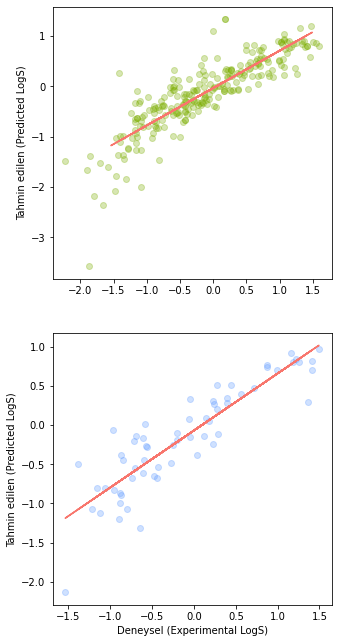

In [58]:
plt.figure(figsize=(5,11))

# 2 row, 1 column, plot 1
plt.subplot(2, 1, 1)
plt.scatter(x=Y_train, y=Y_pred_train, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Tahmin edilen (Predicted LogS)')


# 2 row, 1 column, plot 2
plt.subplot(2, 1, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#619CFF", alpha=0.3)

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Tahmin edilen (Predicted LogS)')
plt.xlabel('Deneysel (Experimental LogS)')

plt.savefig('plot_vertical_logS.png')
plt.savefig('plot_vertical_logS.pdf')
plt.show()

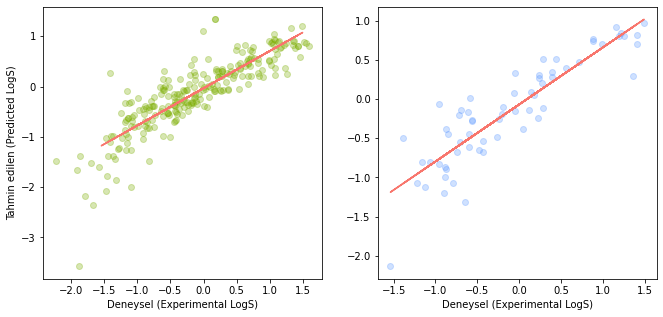

In [59]:

plt.figure(figsize=(11,5))

# 1 row, 2 column, plot 1
plt.subplot(1, 2, 1)
plt.scatter(x=Y_train, y=Y_pred_train, c="#7CAE00", alpha=0.3)

z = np.polyfit(Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")


plt.ylabel('Tahmin edilen (Predicted LogS)')
plt.xlabel('Deneysel (Experimental LogS)')

# 1 row, 2 column, plot 2
plt.subplot(1, 2, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#619CFF", alpha=0.3)

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.xlabel('Deneysel (Experimental LogS)')

plt.savefig('plot_horizontal_logS.png')
plt.savefig('plot_horizontal_logS.pdf')
plt.show()